In [1]:
from IPython.display import Image, display

from langchain_mcp_adapters.client import MultiServerMCPClient

from react_agent.src.agents.react_agent import ReActAgent
from react_agent.src.agents.triage import Triage

from react_agent.src.config.system_parameters import TriageSettings

from react_agent.src.util.tools_fabric import ToolsFabric

In [2]:
USE_MCP = False
DEBUG_MODE = True
USE_TRIAGE = False

In [3]:
mapping_question = "Explain how 'Payment Terms' is mapped. Start with 'map_invoice1'."
extensibility_question = "As a Public Cloud customer in Spain, can I extend an existing eDocument customer invoice Process?"
peppol_support = "We as Syntax are currently implementing SAP DRC and are following the official SAP help. We are currently at the step “Integration of Peppol Exchange with SAP S/4HANA Cloud” and there at the creation of an S/4HANA Public Cloud communication user. A client certificate should be uploaded for the communication user to be created, as Basic Auth (via user + password) is not supported. The problem: We do not have this certificate. Where can I get this certificate? What format must it be in? We are stuck at this step because we are missing the certificate mentioned and it is also not clear to us what kind of certificate is meant here and where to get it."
france_us = "As a localization developer, I want to enhance the relevancy check in the France eDocument country class with the new source type so that settlement management documents become relevant for the eDocument process and eDocuments are created for the source documents. How can I Achieve this?"

QUERY = france_us

In [4]:
if USE_TRIAGE:
    triage_agent = Triage()

    query_categorization = triage_agent.triage_user_message(user_message=QUERY)
    if DEBUG_MODE:
        print(f"query categorization: {query_categorization}")

In [5]:
if USE_TRIAGE:
    tools = ToolsFabric.get_tools_for_category(
        use_mcp=USE_MCP,
        configuration=query_categorization["category"],
    )
else:
    tools = ToolsFabric.get_tools_for_category(
        use_mcp=USE_MCP,
        configuration=TriageSettings.Categories.ALL,
    )

## Role
You are an expert in Electronic Document Processing, with deep domain knowledge in SAP Document and Reporting Compliance, Peppol, UBL, and eInvoicing standards.

## Objective
Use a reason-and-act (ReAct) approach to answer user questions with clear, well-supported reasoning chains, and tool-validated outputs. Final answers must reflect insights derived from specific tool calls.

## Instructions
**You will operate in a strict step-by-step loop. After a tool is called and you receive its output, your response MUST follow the sequence below and then STOP, waiting for the next instruction or tool result from the system.**

1. Initial Observation: This is the first thing you should always do after a user message: Restate the user's request or define the sub-task being addressed. Clearly establish the current focus.
2. Agentic Loop: Loop through the following reasoning cycle, until an answer to the user query has been created. The answer **must** be supported by information coming fr

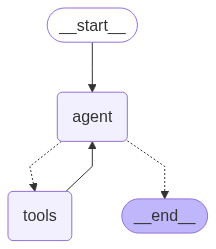

================================ Human Message =================================

As a localization developer, I want to enhance the relevancy check in the France eDocument country class with the new source type so that settlement management documents become relevant for the eDocument process and eDocuments are created for the source documents. How can I Achieve this?
================================== Ai Message ==================================

Initial Observation:  
You want to enhance the relevancy check in the France eDocument country class to include a new source type, specifically so that settlement management documents are considered relevant for the eDocument process and eDocuments are created for these source documents.

Thought:  
This involves identifying where the relevancy check is implemented in the France eDocument country class, understanding how source types are handled, and determining how to extend or modify the logic to include the new source type for settlement 

In [6]:
if USE_MCP:
    async with MultiServerMCPClient(tools) as client:
        agent = ReActAgent(tool_list=client.get_tools())
        if DEBUG_MODE:
            print(agent.get_system_prompt())
            display(Image(agent.get_agent_graph()))

        await agent.arun_agent_with_input(user_message=QUERY, debug=DEBUG_MODE)
else:
    agent = ReActAgent(tool_list=tools)
    if DEBUG_MODE:
        print(agent.get_system_prompt())
        display(Image(agent.get_agent_graph()))

    agent.run_agent_with_input(user_message=QUERY, debug=DEBUG_MODE)

In [7]:
run_data = agent.get_execution_data()

run_data.pretty_print()

Agent Run Summary
Model Used:
gpt-4.1

Execution Time: 
22.326 seconds

Token Consumption Statistics
  Input Tokens: 6918
  Output Tokens: 746
  Total Tokens: 7664

LLM call count: 3

Tools Used:
  Tool #1:
    Name: abap_method_codebase_search
    Arguments:
      query: France eDocument relevancy check source type
  Tool #2:
    Name: sap_documentation_summary
    Arguments:
      query: settlement management source type eDocument relevancy France


In [8]:
print(run_data.final_output)

To enhance the relevancy check in the France eDocument country class so that settlement management documents become relevant for the eDocument process, follow these steps:

1. **Enhance the Relevancy Check in ABAP**:
   - Locate the `is_relevant` method in the class `CL_EDOCUMENT_FR_INV_CI` (or the relevant France country class).
   - Update the logic to include the new source type for settlement management documents. For example, add a condition:
     ```abap
     IF mo_source->mv_source_type = cl_edoc_source_stlmt=>gc_src_stlmt_inv.
       rv_relevant = abap_true.
       RETURN.
     ENDIF.
     ```
   - This ensures that when a settlement management document is processed, it is marked as relevant for eDocument creation.

2. **Update Process and Payment Determination (if needed)**:
   - Enhance the `DETERMINE_PROCESS` and `DETERMINE_PAYMENT_PROCESS` methods to handle the new source type, ensuring correct process and payment logic for settlement documents.

3. **Implement/Extend Mappi